### Função Spline  (cap. 6)

---

> Um spline é uma curva definida matematicamente por dois ou mais pontos de controle. Os pontos de controle que ficam na curva são chamados de nós. Os demais pontos definem a tangente à curva em seus respectivos nós. \[...\]
> 
> Os splines podem ser divididos em duas categorias: **splines de interpolação**, que passam por todos os pontos de controle, e **splines de aproximação**, que passam perto de todos os pontos de controle. [(*Wikipedia*)](https://pt.wikipedia.org/wiki/Spline)

1. [Exercício 1](#Exercício-1:)
2. [Exercício 2](#Exercício-2:)
3. [Exercício 3](#Exercício-3:)
4. [Exercício 4](#Exercício-4:)
5. [Exercício 5](#Exercício-5:)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


#### Exercício 1:

Faça uma amostra uniforme da função 𝑓(𝑥) = 𝑠𝑒𝑛𝑜(𝑥) com 5 observações com 𝑥 no intervalo
[0, 2𝜋].

In [2]:
x = np.linspace(0, 2*np.pi, 5)
y = np.sin(x)

pontos = list(zip(x,y))
pontos

[(0.0, 0.0),
 (1.5707963267948966, 1.0),
 (3.141592653589793, 1.2246467991473532e-16),
 (4.71238898038469, -1.0),
 (6.283185307179586, -2.4492935982947064e-16)]

#### Exercício 2:

Use um software de computação científica para obter a $spline$ cúbica que interpola os pontos
da amostra. 

Faça um gráfico que exiba os pontos da amostra, a função seno e a spline no
intervalo 𝑥 ∈ [0, 2𝜋].

**R:** Utilizando o método [`scipy.interpolate.UnivariateSpline`](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.UnivariateSpline.html) para a interpolação de spline cúbica:

In [3]:
from scipy.interpolate import UnivariateSpline

f = UnivariateSpline(x, y, k=3)

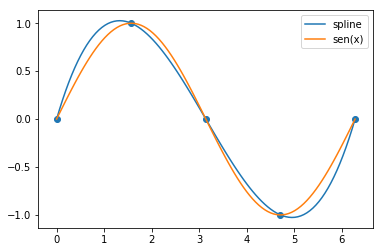

In [4]:
t = np.linspace(0, 2*np.pi, 100) 

y_t = np.sin(t)
f_t = f(t)

plt.plot(t, f(t), label='spline')
plt.plot(t,y_t, label='sen(x)')
plt.scatter(x, y) # pontos

plt.legend()

#### Exercício 3:

Estime o erro quadrático médio obtido pela interpolação.

In [5]:
sqrt_error = list((y - f(y))**2)
sqrt_error

[9.174558271215591e-33,
 0.0007242907840246825,
 1.0704171590085368e-34,
 2.5415574550358193,
 7.110731566452827e-32]

In [6]:
mean(sqrt_error)

0.5084563491639689

#### Exercício 4:

Determine a derivada da função $spline$ obtida em (2). Ela se aproxima da função cosseno?

**R:** Para o cálculo da derivada, utilizei o método [`scipy.interpolate.UnivariateSpline.derivative`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.interpolate.UnivariateSpline.derivative.html)

In [7]:
d_f = f.derivative()

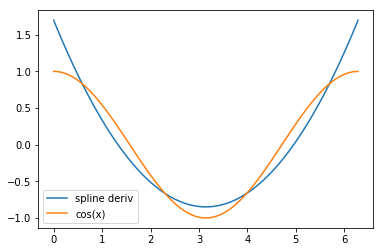

In [8]:
t = np.linspace(0, 2*np.pi, 100) 

y_t = np.cos(t)
d_t = d_f(t)

plt.plot(t, d_t, label='spline deriv')
plt.plot(t, y_t, label='cos(x)')

plt.legend()

Observando o quadrado da diferença das funções $spline$ e $cos(x)$ abaixo (denotado por $e$), vemos que a aproximação é razoável ($e < 0.05$) para os valores centrais de $x$ no intervalo. Porém, ao nos aproximarmos dos extremos, $x \rightarrow 0$ ou $x \rightarrow 2\pi$, o erro aumenta e não temos uma boa aproximação.

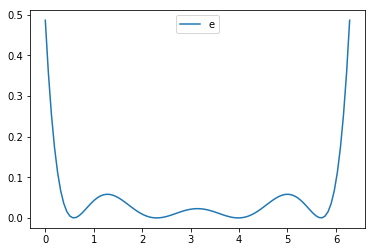

In [9]:
sqrt_error = list((y_t - d_t)**2)

plt.plot(t, sqrt_error, label='e')
plt.legend()

#### Exercício 5: 

Faça um gráfico da espiral obtida por interpolação por spline cúbica dos pontos:

x | 0 | 6 | 0 | -17 | -31 | -28 | 0 | 39 | 63
--|--|--|--|--|--|--|--|--|
y | 0 | 6 | 16 | 17 | 0 | -28 | -47 | -39 | 0

In [10]:
pontos = [(0,0), (6,6), (0,16), (-17,17), (-31, 0), (-28,-28), (0,47), (39, -39), (63,0)]

pontos.sort(key=lambda tup: tup[0])
pontos

[(-31, 0),
 (-28, -28),
 (-17, 17),
 (0, 0),
 (0, 16),
 (0, 47),
 (6, 6),
 (39, -39),
 (63, 0)]

In [11]:
x = list(list(zip(*pontos))[0])
y = list(list(zip(*pontos))[1])

#x = np.r_[x, x[0]]
#y = np.r_[y, y[0]]

O método [`scipy.interpolate.inter1d`](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.interpolate.interp1d.html) utilizado anteriormente só funciona para um conjunto x estritamente crescente.

Para resolver isso, optei pela parametrização dos pontos $(x,y)$. [Pela consulta ao Stack Overflow (indicada pelo Pedro Delfino!)](https://stackoverflow.com/questions/33962717/interpolating-a-closed-curve-using-scipy), foram achados os métodos [`scipy.interpolate.splprep`](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), que faz a parametrização para $(x(t), y(t))$, e [`scipy.interpolate.splev`](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev), que avalia os pontos para gerar a função.

In [12]:
from scipy.interpolate import splprep, splev

tck, t = splprep([x, y], k=3, s=0)
xi, yi = splev(np.linspace(0, 1, 1000), tck)

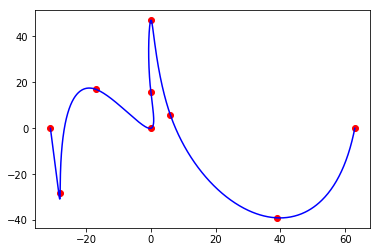

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, '-b')